In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('default')

In [2]:
def number_of_zeros(x):
    for i in range(x.size):
        if x[i] != 0:
            return i
    return 0

In [3]:
df1 = pd.read_csv('../data/raw/nsenos_n10_090v.csv', header=None)
data_array = np.array(df1)
delta_tempo_array = (data_array[:,0] << 16) + (data_array[:,1] << 8) + data_array[:,2]
qnt_zeros = number_of_zeros(delta_tempo_array)
freq_array_nsenos_n10_090v = np.zeros(delta_tempo_array.shape)
freq_array_nsenos_n10_090v[qnt_zeros:] = 1/7/(delta_tempo_array[qnt_zeros:]*1e-5) * (2*np.pi) # removido os zeros de "delta_tempo_array" 
entrada_array_nsenos_n10_090v = (data_array[:,3]-125)/(249-125) * 9
df2 = pd.DataFrame([entrada_array_nsenos_n10_090v,freq_array_nsenos_n10_090v]).T
df2.to_csv('../data/entrada_saida_nsenos_n10_090v.csv',header=False,index=False)

In [4]:
df1 = pd.read_csv('../data/raw/nsenos_n10_097v.csv', header=None)
data_array = np.array(df1)
delta_tempo_array = (data_array[:,0] << 16) + (data_array[:,1] << 8) + data_array[:,2]
qnt_zeros = number_of_zeros(delta_tempo_array)
freq_array_nsenos_n10_097v = np.zeros(delta_tempo_array.shape)
freq_array_nsenos_n10_097v[qnt_zeros:] = 1/7/(delta_tempo_array[qnt_zeros:]*1e-5) * (2*np.pi) # removido os zeros de "delta_tempo_array" 
entrada_array_nsenos_n10_097v = (data_array[:,3]-125)/(249-125) * 9.7
df2 = pd.DataFrame([entrada_array_nsenos_n10_097v,freq_array_nsenos_n10_097v]).T
df2.to_csv('../data/entrada_saida_nsenos_n10_097v.csv',header=False,index=False)

In [5]:
df1 = pd.read_csv('../data/raw/nsenos_n10_104v.csv', header=None)
data_array = np.array(df1)
delta_tempo_array = (data_array[:,0] << 16) + (data_array[:,1] << 8) + data_array[:,2]
qnt_zeros = number_of_zeros(delta_tempo_array)
freq_array_nsenos_n10_104v = np.zeros(delta_tempo_array.shape)
freq_array_nsenos_n10_104v[qnt_zeros:] = 1/7/(delta_tempo_array[qnt_zeros:]*1e-5) * (2*np.pi) # removido os zeros de "delta_tempo_array" 
entrada_array_nsenos_n10_104v = (data_array[:,3]-125)/(249-125) * 10.4
df2 = pd.DataFrame([entrada_array_nsenos_n10_104v,freq_array_nsenos_n10_104v]).T
df2.to_csv('../data/entrada_saida_nsenos_n10_104v.csv',header=False,index=False)

In [6]:
df1 = pd.read_csv('../data/raw/nsenos_n10_111v.csv', header=None)
data_array = np.array(df1)
delta_tempo_array = (data_array[:,0] << 16) + (data_array[:,1] << 8) + data_array[:,2]
qnt_zeros = number_of_zeros(delta_tempo_array)
freq_array_nsenos_n10_111v = np.zeros(delta_tempo_array.shape)
freq_array_nsenos_n10_111v[qnt_zeros:] = 1/7/(delta_tempo_array[qnt_zeros:]*1e-5) * (2*np.pi)
entrada_array_nsenos_n10_111v = (data_array[:,3]-125)/(249-125) * 11.1
df2 = pd.DataFrame([entrada_array_nsenos_n10_111v,freq_array_nsenos_n10_111v]).T
df2.to_csv('../data/entrada_saida_nsenos_n10_111v.csv',header=False,index=False)

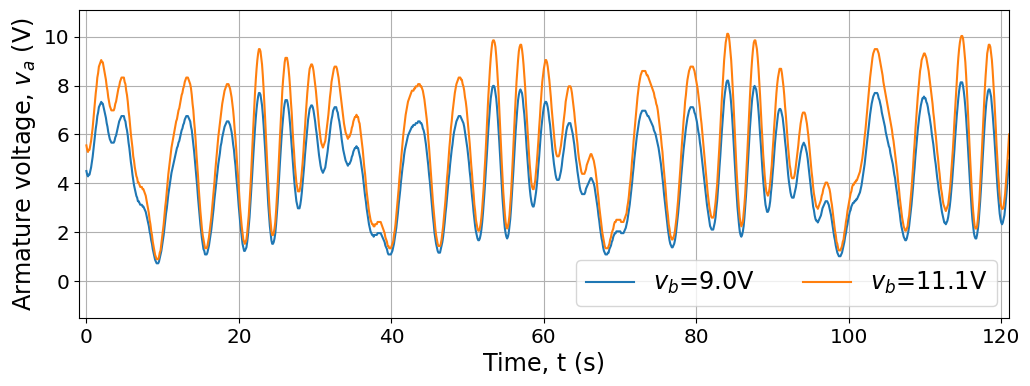

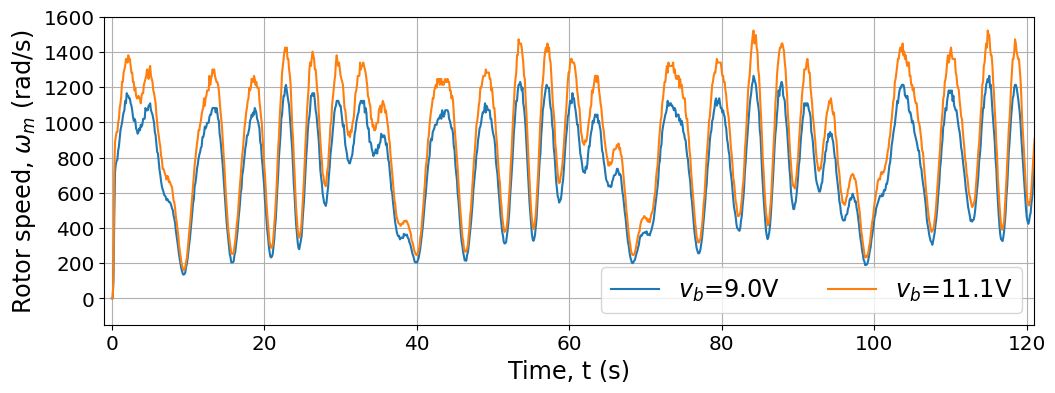

In [9]:
t = np.arange(0,entrada_array_nsenos_n10_090v.size)*0.1024

fig = plt.figure(1,figsize=[12,4])
plt.grid(True)
plt.ylim([-1.5,11.1])
plt.xlim([-1,121])
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xlabel('Time, t (s)',fontsize='xx-large')
plt.ylabel('Armature voltage, $v_a$ (V)',fontsize='xx-large')

plt.plot(t,entrada_array_nsenos_n10_090v, label='$v_b$=9.0V')
plt.plot(t,entrada_array_nsenos_n10_111v, label='$v_b$=11.1V')
plt.legend(fontsize='xx-large', ncol=2, loc='lower right')
plt.savefig(fname='../figures/entradas_9v_111v.png')

plt.figure(2,figsize=[12,4])
plt.grid(True)
plt.ylim([-150,1600])
plt.xlim([-1,121])
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xlabel('Time, t (s)',fontsize='xx-large')
plt.ylabel('Rotor speed, $\omega_m$ (rad/s)',fontsize='xx-large')

plt.plot(t,freq_array_nsenos_n10_090v, label='$v_b$=9.0V')
plt.plot(t,freq_array_nsenos_n10_111v, label='$v_b$=11.1V')
plt.legend(fontsize='xx-large', ncol=2,loc='lower right')
fig.savefig(fname='../figures/saidas_9v_111v.png')